In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

**Process**
- Data Cleaning
- EDA
- Text preprocessing
- Model Building
- Evaluation
- Improvements 
- website
- deployment

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**Drop unnamed 2, unnamed 3,unnamed 4**
- very few values are not null

In [7]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

**we are not able to understand that what exactly is the v1 and v2 so we renaming these two columns**

In [8]:
data.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [9]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data["Target"].unique()

array(['ham', 'spam'], dtype=object)

**Here ham(not spam) and spam(spam message) we can indicate spam(1) and ham(0).**
- Use label encoder for this.

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
LE=LabelEncoder()
data["Target"]=LE.fit_transform(data["Target"])

In [13]:
data["Target"].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [14]:
data.duplicated().sum()

403

In [15]:
df=data.drop_duplicates(keep="first")

In [16]:
df.duplicated().sum()

0

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.shape

(5169, 2)

**2.EDA**

In [19]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

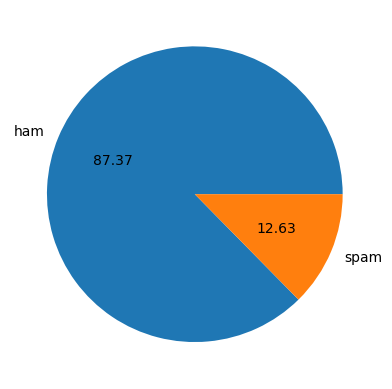

In [20]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

**87.37% of messages are not spam and 12.63 of messages are spam**
- Imbalanced dataset

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df["no_charecters"]=df["Text"].apply(len)

In [26]:
df.head()

,Target,Text,no_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df["no_words"]=df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,no_charecters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df["no_sentence"]=df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,no_charecters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[["no_charecters","no_words","no_sentence"]].describe().T

,count,mean,std,min,25%,50%,75%,max
no_charecters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
no_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
no_sentence,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


In [32]:
df[df["Target"]==0][["no_charecters","no_words","no_sentence"]].describe().T

,count,mean,std,min,25%,50%,75%,max
no_charecters,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
no_words,4516.0,17.120903,13.493725,1.0,8.0,13.0,22.0,220.0
no_sentence,4516.0,1.799601,1.278465,1.0,1.0,1.0,2.0,28.0


In [33]:
df[df["Target"]==1][["no_charecters","no_words","no_sentence"]].describe().T

,count,mean,std,min,25%,50%,75%,max
no_charecters,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
no_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
no_sentence,653.0,2.967841,1.483201,1.0,2.0,3.0,4.0,8.0


<Axes: xlabel='no_charecters', ylabel='Count'>

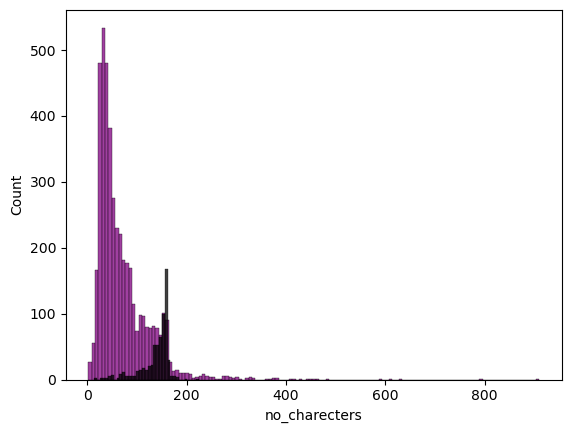

In [34]:
sns.histplot(df[df["Target"]==0]["no_charecters"],color="purple")
sns.histplot(df[df["Target"]==1]["no_charecters"],color="black")

<Axes: xlabel='no_words', ylabel='Count'>

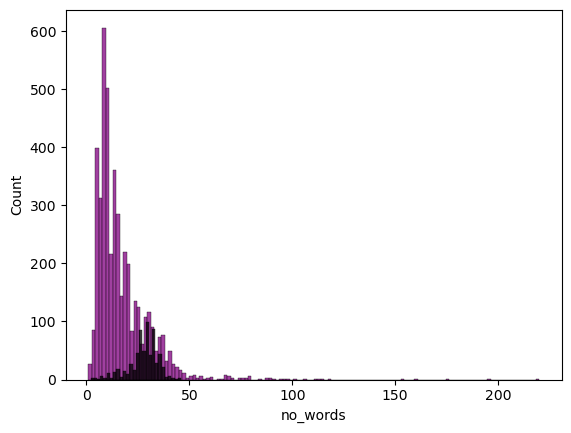

In [35]:
sns.histplot(df[df["Target"]==0]["no_words"],color="purple")
sns.histplot(df[df["Target"]==1]["no_words"],color="black")

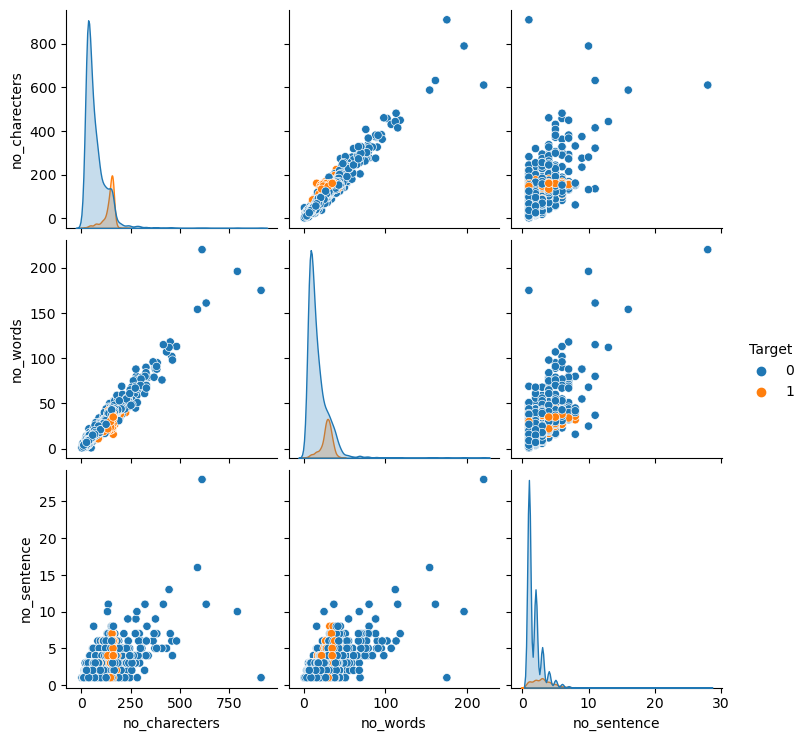

In [36]:
sns.pairplot(df,hue="Target")

<Axes: >

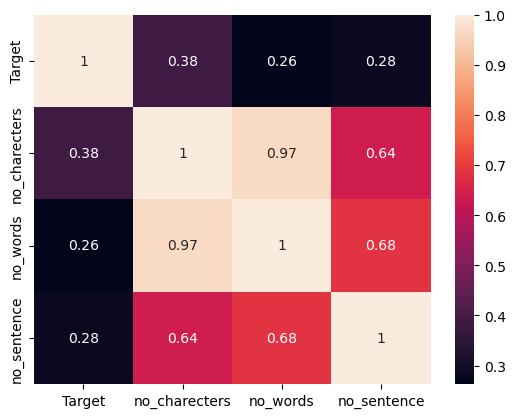

In [37]:
corr=df.corr()
sns.heatmap(corr,annot=True)

**we will keep only no_characters column because it has the high corelation with target**

**Data Preprocessing**
- lower case
- tokenization
- remove special characters
- remove stop words and punctuation
- stemming

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [41]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
df["Transformed_text"]=df["Text"].apply(text_transform)


In [43]:
df.head()

,Target,Text,no_charecters,no_words,no_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color ="black")

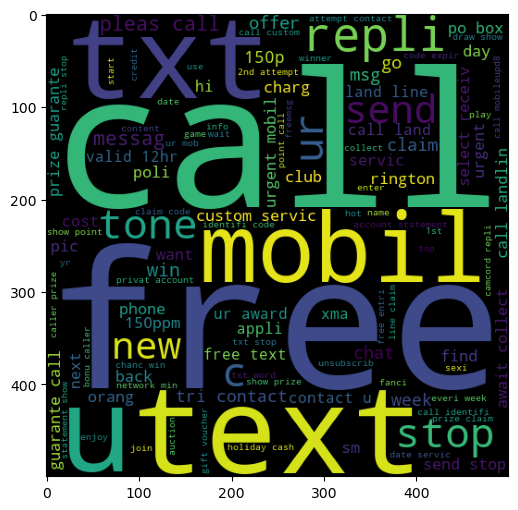

In [46]:
spamWC = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

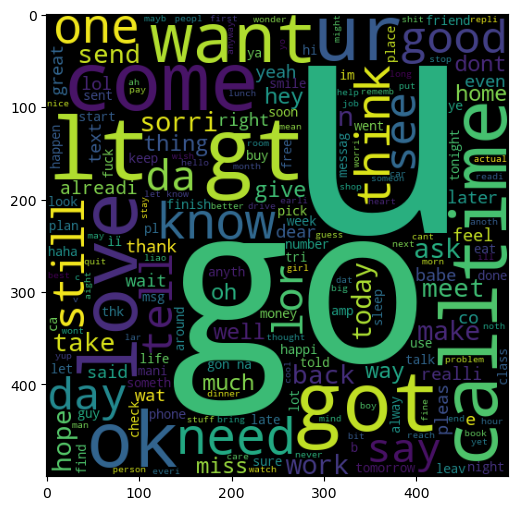

In [47]:
hamWC = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(hamWC)

In [48]:
df.head()

,Target,Text,no_charecters,no_words,no_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Vectorize the text**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(df["Transformed_text"]).toarray()
y=df["Target"].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [77]:
models = {
    'SVC' : svc,
    'KNN' : knn, 
    'MNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [78]:
accuracy_scores = []
precision_scores = []

for k,v in models.items():
    v.fit(X_train,y_train)
    y_pred=v.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


In [79]:
print(accuracy_scores)
print(precision_scores)

[0.9730363423212193, 0.8921453692848769, 0.9513481828839391, 0.9331770222743259, 0.9419695193434936, 0.963071512309496]
[0.9653465346534653, 1.0, 1.0, 0.803030303030303, 0.8857142857142857, 0.9942196531791907]


In [80]:
model_performance = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
model_performance

,Algorithm,Accuracy,Precision
1,KNN,0.892145,1.000000
2,MNB,0.951348,1.000000
5,RF,0.963072,0.994220
0,SVC,0.973036,0.965347
4,LR,0.941970,0.885714
3,DT,0.933177,0.803030


**Naive Bayes has the high acccuracy and the high precision.In this case precision is more important than accuracy.we can try to improve the accuracy by any way**

In [81]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('knn',knc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9337631887456037
Precision 1.0


**Accuracy dropped**

In [82]:
estimators=[('rf', rfc), ('nb', mnb), ('knn',knc)]
final_estimator=ExtraTreesClassifier()
from sklearn.ensemble import StackingClassifier
stacking_classifier= StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train,y_train)
y_pred = stacking_classifier.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9706916764361079
Precision 0.896551724137931


**Accuracy increase but precision droppped**

In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))